# ME21B174 FML ASSIGNMENT 1 REPORT 

# Question 1

## PART 1 (i)

Importing the necessary libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Before loading the dataset, I have directly added column headers x1, x2 and y on the csv files for better understanding and viewing (in both train and test dataset). 

In [84]:
# Loading the dataset
train_data = pd.read_csv("FMLA1Q1Data_train.csv")
test_data = pd.read_csv("FMLA1Q1Data_test.csv")
train_data["x0"] = 1
test_data["x0"] = 1

Next, I have defined X and y matrices for both test and training data. 

In [85]:
y_train = train_data["y"]
X_train = train_data.drop("y", axis=1)
print(X_train)
print(y_train)

          x1       x2  x0
0    0.53767  0.67370   1
1    1.83390 -0.66911   1
2   -2.25880 -0.40032   1
3    0.86217 -0.67180   1
4    0.31877  0.57563   1
..       ...      ...  ..
995  1.51060  2.02370   1
996  0.16401  0.77779   1
997 -0.28276 -0.54890   1
998  1.15220 -0.12601   1
999 -1.14650  0.29958   1

[1000 rows x 3 columns]
0       9.7251
1      11.1090
2      22.0270
3       2.4278
4       6.5156
        ...   
995    58.0210
996     7.5994
997     1.5992
998     7.3712
999     3.2247
Name: y, Length: 1000, dtype: float64


In [86]:
y_test = test_data["y"]
X_test = test_data.drop("y", axis=1)
print(X_test)
print(y_test)

         x1        x2  x0
0   0.87060 -0.730160   1
1   0.33076 -0.916330   1
2  -1.34790  1.787600   1
3   1.54790 -0.820400   1
4  -0.61664 -0.196710   1
..      ...       ...  ..
95 -2.10320  0.659230   1
96  0.37392 -1.280400   1
97  0.24518  0.050124   1
98  0.33858  0.548400   1
99 -1.07810  1.778400   1

[100 rows x 3 columns]
0      2.4105
1      1.6318
2     12.3770
3      6.8406
4      1.6138
       ...   
95    10.4300
96     3.9106
97     1.9747
98     6.2960
99    13.0210
Name: y, Length: 100, dtype: float64


Here, I have used the analytical solution of the regression problem to obtain the least squares solution. 

We know that the analytical solution is inv(X * X.T) * X * Y.

I have used the inverse function from numpy library to calculate the inverse of (X * X.T).

In [87]:
w_ml = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(w_ml)

0    1.765706
1    3.521590
2    9.894008
dtype: float64


## PART 1 (ii)

In [88]:
def gradient_descent (X, y, w, learning_rate, epochs, w_ml, error_function):

    for i in range(epochs):

        gradient = (2 * (X.T @ ((X @ w) - y)))

        w = w - learning_rate * gradient

        error_function[i] = np.sum((w - w_ml) ** 2)

    return w

In [89]:
X_train = X_train
y_train = np.array(y_train)
w_ml = np.array(w_ml)
w_init = np.zeros(X_train.shape[1])
epochs = 50
error_function = np.zeros(epochs)


learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

for l in learning_rates :
    w = gradient_descent(X_train, y_train, w_init, l, epochs, w_ml, error_function)
    print(f"w_obtained: {w}")
    print(f"w_theroretical: {w_ml}")
    print()

w_obtained: x1    0.988634
x2    2.363748
x0    6.313289
dtype: float64
w_theroretical: [1.76570568 3.5215898  9.89400832]

w_obtained: x1    1.765618
x2    3.521598
x0    9.893854
dtype: float64
w_theroretical: [1.76570568 3.5215898  9.89400832]

w_obtained: x1    623.208271
x2   -669.489872
x0   -833.346386
dtype: float64
w_theroretical: [1.76570568 3.5215898  9.89400832]

w_obtained: x1    5.021422e+65
x2   -5.682289e+65
x0   -7.051216e+65
dtype: float64
w_theroretical: [1.76570568 3.5215898  9.89400832]

w_obtained: x1    4.477499e+116
x2   -5.105347e+116
x0   -6.330279e+116
dtype: float64
w_theroretical: [1.76570568 3.5215898  9.89400832]

w_obtained: x1    5.543545e+166
x2   -6.325833e+166
x0   -7.843045e+166
dtype: float64
w_theroretical: [1.76570568 3.5215898  9.89400832]

w_obtained: x1    5.662925e+216
x2   -6.462568e+216
x0   -8.012519e+216
dtype: float64
w_theroretical: [1.76570568 3.5215898  9.89400832]



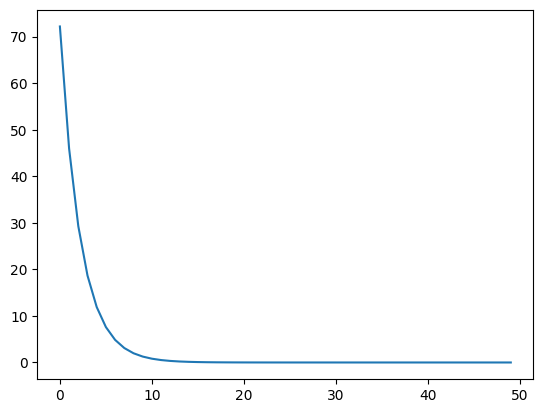

In [90]:
w = gradient_descent(X_train, y_train, w_init, 0.0001, epochs, w_ml, error_function)
plt.plot(error_function)

In [91]:
def stochastic_gradient_descent(data, w, learning_rate, epochs, w_ml, error_function):

    for epoch in range(epochs):
        
        # Shuffle the training data
        data.sample(frac=1).reset_index(inplace=True, drop=True)
    
        no_batches = 10
        # Iterate over each batch
        for i in range(0, no_batches):

            st_idx = i*int(len(data)/no_batches)
            end_idx = (i+1)*int(len(data)/no_batches)

            # Separate the features (X_rand) and target (y_rand)
            X_rand = data.iloc[st_idx:end_idx].drop("y", axis=1)
            y_rand = data.iloc[st_idx:end_idx]["y"]
            
            # Calculate the gradient
            gradient = 2 * (X_rand.T @ ((X_rand @ w) - y_rand))
            
            # Update the weights
            w = w - learning_rate * gradient
            
            # Calculate and store the error for the current epoch
            
        error_function[epoch] = np.sum((w - w_ml) ** 2)
    
    return w

x1    1.686126
x2    3.436348
x0    9.700123
dtype: float64


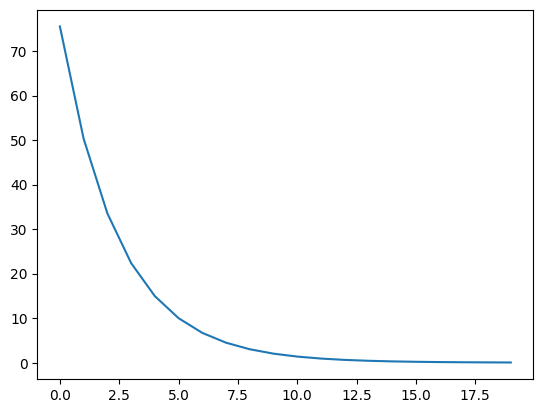

In [92]:
w_init = np.zeros(X_train.shape[1])
epochs = 20
error_function= np.zeros(epochs)

w_stochastic = stochastic_gradient_descent(train_data, w_init, 0.0001, epochs, w_ml, error_function)
print(w_stochastic)
plt.plot(error_function)

In [93]:
def ridge_regresssion(X, y, w, learning_rate, epochs, lamda):

    for i in range(epochs):

        gradient = (2 * (X.T @ ((X @ w) - y)) + 2 * lamda* w) / len(y)

        w = w - learning_rate * gradient

    return w

In [94]:
def error(y_pred, y_true):
    return (np.sum((y_pred - y_true) ** 2)/ len(y_pred))

165.65124787094973
165.65125366644384
165.65131162146125
165.6518911792415
165.6576875173934
165.7157266519064
166.30341720830674
172.68354241502573


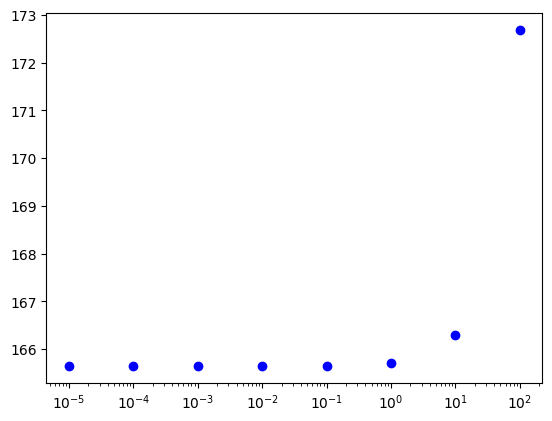

In [95]:
# Train test split

val_split = train_data.iloc[:200, :]
train_split =train_data.iloc[200:, :]

X_train_split = train_split.drop("y", axis = 1)
y_train_split = train_split["y"]

X_val_split = val_split.drop("y", axis = 1)
y_val_split = val_split["y"]

w_init = np.zeros(X_train.shape[1])
epochs = 1000
lamda = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for l in lamda :

    w_ridge = ridge_regresssion(X_train_split, y_train_split, w_init, 0.1, epochs, l)

    y_val_pred = X_val_split @ w_ridge
    y_val_pred_ml = X_val_split @ w_ml

    print(error(y_val_pred, y_val_split))

    plt.plot(l, error(y_val_pred, y_val_split), 'bo') 
    plt.xscale('log')
    

In [96]:
w_ridge = ridge_regresssion(X_train, y_train, w_init, 0.0001, epochs, 0.001)

y_pred_ridge = X_test @ w_ridge 

y_pred_ml = X_test @ w_ml

ridge_error = error(y_pred_ridge, y_test)
ml_error = error(y_pred_ml, y_test)

print(ridge_error)
print(ml_error) 

126.49473446859092
66.00545933461238


In [97]:
def guassian_kernel(x, xi, mu):
    z = np.linalg.norm(xi- x)/mu
    return (np.exp((-z**2)/2))/(np.sqrt(2*np.pi))

def kernel_regression(X_train, X_test, mu):
    weights = []
    for i, xi in X_test.iterrows():
        kernels = [guassian_kernel(x, xi, mu) for idx, x in X_train.iterrows()]
        sim_score = [X_train.shape[0]*kernel/np.sum(kernels) for kernel in kernels]
        weights.append(sim_score)
    weights = np.array(weights)
    return weights

In [98]:
w_kernel = kernel_regression(X_train, X_test, 0.01)

C:\Users\sakth\AppData\Local\Temp\ipykernel_27012\438299021.py:9: RuntimeWarning: invalid value encountered in scalar divide
  sim_score = [X_train.shape[0]*kernel/np.sum(kernels) for kernel in kernels]


In [99]:
w_kernel.shape

(100, 1000)

In [100]:
y_pred_kernel = []
for weight in w_kernel:
    y_pred_kernel.append((weight.T @ y_train)/X_train.shape[0])

kernel_error = (np.sum((y_pred_kernel - y_test)**2))/len(y_test)
kernel_error

np.float64(0.9829561623365762)